### Entendimento dos dados

In [1]:
import pandas as pd
import numpy as np
import warnings
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline



from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import OneHotEncoder #, SimpleImputer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score


In [2]:
# Caminhos dos arquivos
zip_file_path = "Bases_Case.zip"
extract_dir = "Base_Case"

# Extração do zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Salvar em pasta espacifica
    zip_ref.extractall(extract_dir)

In [3]:
path_compras = 'Base_Case/case_compras.csv'
path_pgtos = 'Base_Case/case_pgtos.csv'
path_target = 'Base_Case/case_target.csv'

df_compras = pd.read_csv(path_compras, sep=',')
df_pgtos = pd.read_csv(path_pgtos, sep=',')
df_target = pd.read_csv(path_target, sep=',')

In [4]:
df_compras

,id_venda,id_semana,id_cliente,id_loja,id_item,id_item_cluster,id_item_departamento,id_item_divisao,id_item_familia,vl_item,qt_item
0,2915371490,201941,32898564,323.0,9611555,234,18,1,1,19.99,1
1,4845779621,202310,39611227,430.0,10869605,577,58,5,1,79.99,1
2,4242159670,202152,41485282,300.0,10403923,525,52,5,1,12.99,1
3,2998541230,201949,42839533,486.0,9672625,820,63,6,1,45.00,1
4,4444277097,202214,47657637,226.0,10611779,880,23,6,1,24.99,1
...,...,...,...,...,...,...,...,...,...,...,...
210204,3069431158,202003,41737944,585.0,9774041,322,13,1,1,39.99,1
210205,2485372197,201904,40008819,393.0,8473250,198,38,3,1,19.99,1
210206,4283130109,202203,66090832,615.0,10782954,794,15,1,1,159.99,1
210207,3555226020,202048,63635099,753.0,9699207,861,23,6,1,29.59,1


In [5]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('Number of rows = {}'.format(df_compras.shape[0]))
print('Number of columns = {}'.format(df_compras.shape[1]),'\n')
print('head of columns = {}'.format(df_compras.columns.values))

print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df_compras.info())

-------------------- General information data of the data frame -------------------- 

Number of rows = 210209
Number of columns = 11 

head of columns = ['id_venda' 'id_semana' 'id_cliente' 'id_loja' 'id_item' 'id_item_cluster'
 'id_item_departamento' 'id_item_divisao' 'id_item_familia' 'vl_item'
 'qt_item']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210209 entries, 0 to 210208
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_venda              210209 non-null  int64  
 1   id_semana             210209 non-null  int64  
 2   id_cliente            210209 non-null  int64  
 3   id_loja               210209 non-null  float64
 4   id_item               210209 non-null  int64  
 5   id_item_cluster       210209 non-null  int64  
 6   id_item_departamento  210209 non-null  int64  
 7   id_item_divisao       210209 n

In [6]:
df_pgtos

,id_venda,id_meio_pgto,vl_pgto
0,2434251042,1000,29.99
1,2434291256,8000,89.97
2,2434297114,3111,99.99
3,2434306371,8000,109.97
4,2434308165,3003,279.94
...,...,...,...
72797,5720169043,3003,179.00
72798,5720176044,3003,89.50
72799,5720177094,3003,79.94
72800,5720205050,4050,89.50


In [7]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('Number of rows = {}'.format(df_pgtos.shape[0]))
print('Number of columns = {}'.format(df_pgtos.shape[1]),'\n')
print('head of columns = {}'.format(df_pgtos.columns.values))

print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df_pgtos.info())

-------------------- General information data of the data frame -------------------- 

Number of rows = 72802
Number of columns = 3 

head of columns = ['id_venda' 'id_meio_pgto' 'vl_pgto']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72802 entries, 0 to 72801
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_venda      72802 non-null  int64  
 1   id_meio_pgto  72802 non-null  int64  
 2   vl_pgto       72802 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.7 MB
None


In [8]:
df_target

,id_cliente,target
0,33654260,0
1,93981522,0
2,41653219,0
3,44198537,0
4,36485574,0
...,...,...
12012,69903232,0
12013,49009789,0
12014,42187203,0
12015,35370802,0


In [9]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('Number of rows = {}'.format(df_target.shape[0]))
print('Number of columns = {}'.format(df_target.shape[1]),'\n')
print('head of columns = {}'.format(df_target.columns.values))

print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df_target.info())

-------------------- General information data of the data frame -------------------- 

Number of rows = 12017
Number of columns = 2 

head of columns = ['id_cliente' 'target']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  12017 non-null  int64
 1   target      12017 non-null  int64
dtypes: int64(2)
memory usage: 187.9 KB
None


Pontos importantes:
 - Base se dados nulos aparentemente
 - aparentemente são dados dos clientes de uma amostra

In [10]:
df_compras_pgtos = df_compras.merge(df_pgtos, on='id_venda', how='left')
# temos algumas compras sem o seu respectivo pagamento

In [11]:
print(f'Porcentagem de compras sem pagamento: {round((df_compras_pgtos["id_meio_pgto"].isnull().sum()/df_compras_pgtos.shape[0])*100,2)}%')

Porcentagem de compras sem pagamento: 15.98%


In [12]:
df_compras_pgtos_target = df_compras_pgtos.merge(df_target, on='id_cliente', how='left')

In [13]:
# Separação de registros com e sem pagamento
df_base = df_compras_pgtos_target[~df_compras_pgtos_target["id_meio_pgto"].isnull()]
df_pgtos_null = df_compras_pgtos_target[df_compras_pgtos_target["id_meio_pgto"].isnull()]
df_pgtos_null.shape

(36645, 14)

In [14]:
print('-'*20, 'General information data of the data frame', '-'*20, '\n')
print('Number of rows = {}'.format(df_base.shape[0]))
print('Number of columns = {}'.format(df_base.shape[1]),'\n')
print('head of columns = {}'.format(df_base.columns.values))

print('-'*20, 'Information of type for column', '-'*20, '\n')
print(df_base.info())

-------------------- General information data of the data frame -------------------- 

Number of rows = 192709
Number of columns = 14 

head of columns = ['id_venda' 'id_semana' 'id_cliente' 'id_loja' 'id_item' 'id_item_cluster'
 'id_item_departamento' 'id_item_divisao' 'id_item_familia' 'vl_item'
 'qt_item' 'id_meio_pgto' 'vl_pgto' 'target']
-------------------- Information of type for column -------------------- 

<class 'pandas.core.frame.DataFrame'>
Index: 192709 entries, 0 to 229353
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_venda              192709 non-null  int64  
 1   id_semana             192709 non-null  int64  
 2   id_cliente            192709 non-null  int64  
 3   id_loja               192709 non-null  float64
 4   id_item               192709 non-null  int64  
 5   id_item_cluster       192709 non-null  int64  
 6   id_item_departamento  192709 non-null  int64  
 7   i

In [15]:
# Quantidade de cientes
for i in df_base.columns:
    print(f'Qtd de valores unicos em {i}: {df_base[i].nunique()}')

#Estimar  tempo por semanas
anos = df_base["id_semana"].nunique() // 52.197
meses = (df_base["id_semana"].nunique() % 52.197) // 4.34825  # 4.34825 semanas em um mês
print(f'Tempo histórico estimado: {int(anos)} anos e {int(meses)} meses')
# print(f'Tempo historico estimado: {df_base["id_semana"].nunique()/52.197}') #52.197 semanas em 1 ano
print(f'Ratio qtd compras por clientes: {round(df_base["id_venda"].nunique()/df_base["id_cliente"].nunique(),2)}')
print(f'Ratio qtd items por venda: {round(df_base["id_item"].nunique()/df_base["id_venda"].nunique(),2)}')

Qtd de valores unicos em id_venda: 66850
Qtd de valores unicos em id_semana: 267
Qtd de valores unicos em id_cliente: 9146
Qtd de valores unicos em id_loja: 349
Qtd de valores unicos em id_item: 105735
Qtd de valores unicos em id_item_cluster: 330
Qtd de valores unicos em id_item_departamento: 47
Qtd de valores unicos em id_item_divisao: 11
Qtd de valores unicos em id_item_familia: 3
Qtd de valores unicos em vl_item: 4371
Qtd de valores unicos em qt_item: 14
Qtd de valores unicos em id_meio_pgto: 34
Qtd de valores unicos em vl_pgto: 13392
Qtd de valores unicos em target: 2
Tempo histórico estimado: 5 anos e 1 meses
Ratio qtd compras por clientes: 7.31
Ratio qtd items por venda: 1.58


In [16]:
colunas_idx = [x for x in df_base.columns if df_base[x].nunique()/len(df_base)< 0.005]

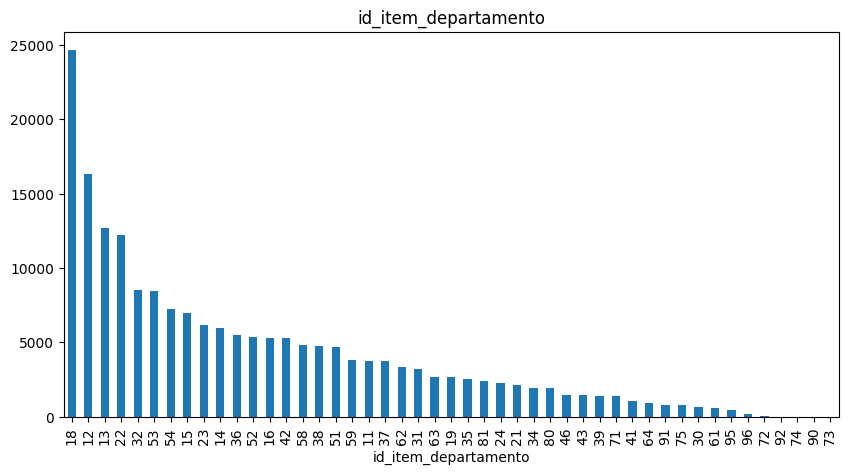

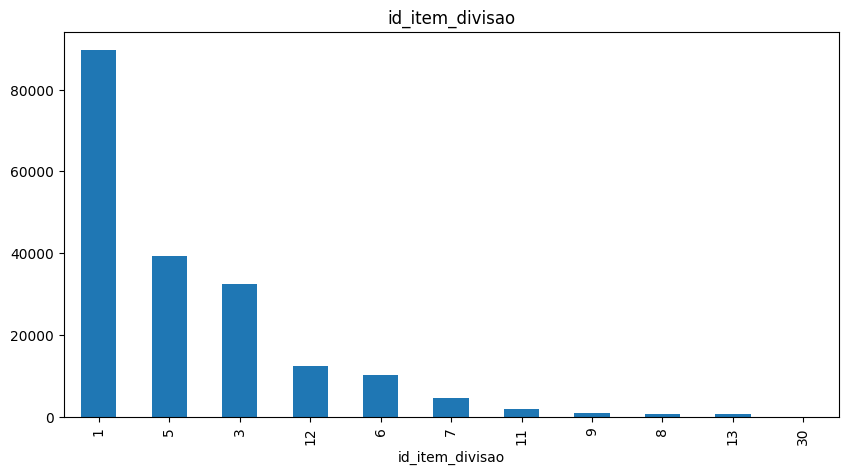

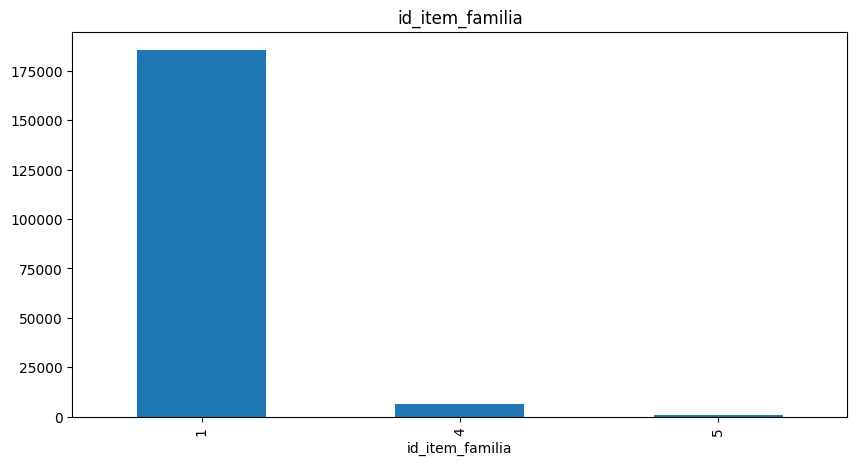

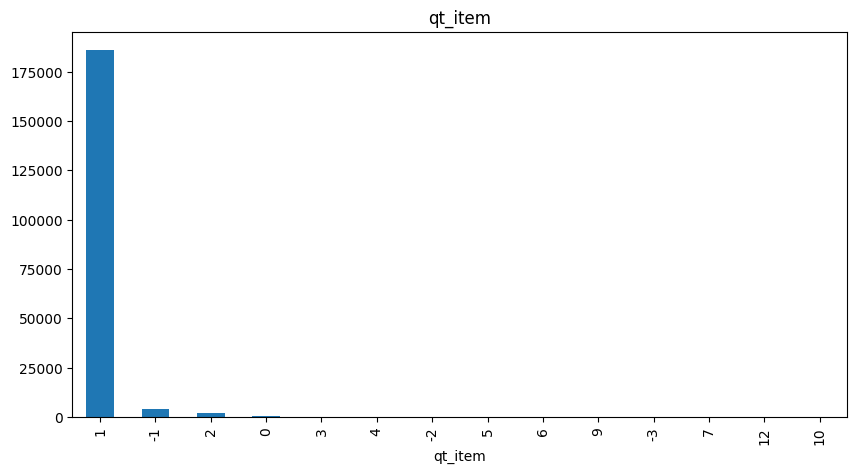

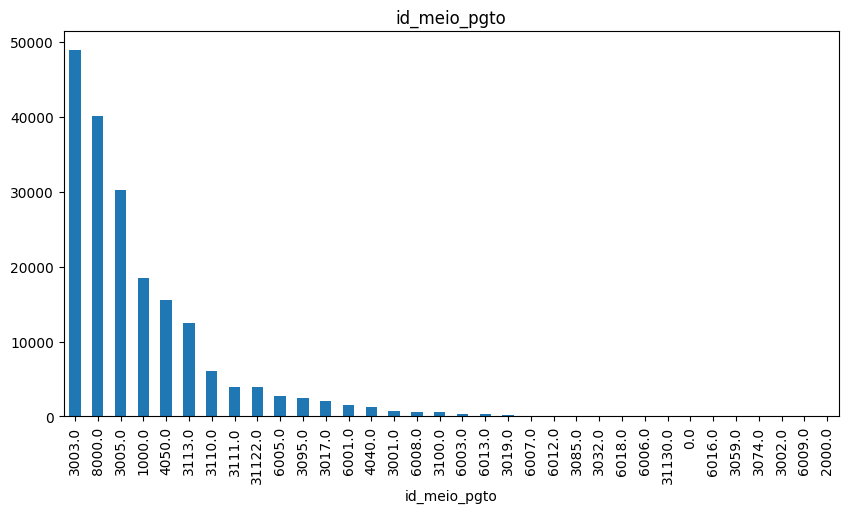

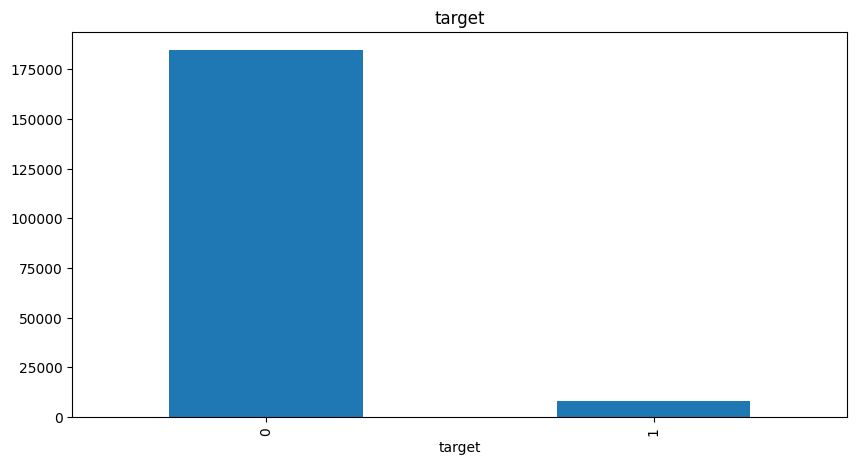

In [17]:
list_plot = [
 'id_item_departamento',
 'id_item_divisao',
 'id_item_familia',
 'qt_item',
 'id_meio_pgto',
 'target']


for column in list_plot:
    plt.figure(figsize=(10,5))
    df_base[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()
#plot_value_counts(df)

In [18]:
df_base['ano'] = df_base['id_semana'].apply(lambda x: str(x)[:4]).astype(int)
df_base['semana'] = df_base['id_semana'].apply(lambda x: str(x)[4:]).astype(int)
df_base['target'] = df_base['target'].astype(str)

In [19]:
df_base.head()

,id_venda,id_semana,id_cliente,id_loja,id_item,id_item_cluster,id_item_departamento,id_item_divisao,id_item_familia,vl_item,qt_item,id_meio_pgto,vl_pgto,target,ano,semana
0,2915371490,201941,32898564,323.0,9611555,234,18,1,1,19.99,1,3003.0,377.89,0,2019,41
1,4845779621,202310,39611227,430.0,10869605,577,58,5,1,79.99,1,3005.0,259.94,0,2023,10
2,4242159670,202152,41485282,300.0,10403923,525,52,5,1,12.99,1,1000.0,105.96,0,2021,52
3,2998541230,201949,42839533,486.0,9672625,820,63,6,1,45.00,1,3113.0,197.05,0,2019,49
4,4444277097,202214,47657637,226.0,10611779,880,23,6,1,24.99,1,8000.0,24.99,0,2022,14


Text(0.5, 1.0, 'Boxplot de vl_pgto')

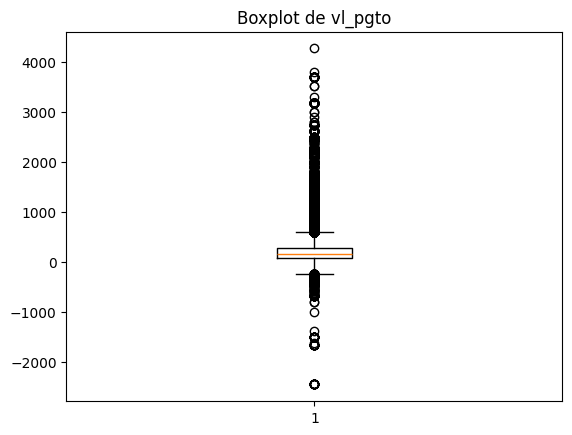

In [20]:
plt.boxplot(df_base['vl_pgto'])
plt.title('Boxplot de vl_pgto')

# Valores negativos? são estornos ou devoluções?

In [21]:
def calculate_mode(series):
    return series.mode()[0]

df_agrupado = df_base.groupby(['id_cliente', 'target']).agg(qtd_compras=('id_venda', 'nunique'),
                                              qtd_lojas=('id_loja', 'nunique'),
                                              loja_recorrente=('id_loja', calculate_mode),
                                              qtd_items=('id_item', 'nunique'),
                                              qtd_departamento=('id_item_departamento', 'nunique'),
                                              qtd_divisao=('id_item_divisao', 'nunique'),
                                              qtd_familia=('id_item_familia', 'nunique'),
                                              pgto_medio=('vl_pgto', 'mean'),
                                              pgto_max=('vl_pgto', 'max'),
                                              pgto_min=('vl_pgto', 'min'),
                                              pgto_total=('vl_pgto', 'sum'),
                                              semn_mais_compra=('semana', calculate_mode)
                                              ).reset_index()


df_agrupado

,id_cliente,target,qtd_compras,qtd_lojas,loja_recorrente,qtd_items,qtd_departamento,qtd_divisao,qtd_familia,pgto_medio,pgto_max,pgto_min,pgto_total,semn_mais_compra
0,31244574,0,49,11,620.0,82,20,7,2,110.243469,359.930000,-189.980000,10803.86,2
1,31249777,0,2,1,175.0,3,2,2,1,70.650000,75.980000,59.990000,211.95,51
2,31253032,0,2,1,725.0,3,3,2,1,33.186000,39.990014,27.979986,165.93,1
3,31257814,0,1,1,606.0,14,1,1,1,488.770000,488.770000,488.770000,6842.78,2
4,31260068,0,18,7,625.0,50,12,4,1,248.063800,506.900000,22.990000,12403.19,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,93793418,0,1,1,307.0,1,1,1,1,189.990000,189.990000,189.990000,189.99,4
9142,93799853,0,1,1,530.0,2,2,1,1,179.000000,179.000000,179.000000,358.00,5
9143,93800964,0,2,1,645.0,2,2,2,1,0.000000,89.990000,-89.990000,0.00,5
9144,93810695,0,1,1,100.0,5,1,1,1,104.975000,159.949989,50.000011,1049.75,5


In [22]:
df_agrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_cliente        9146 non-null   int64  
 1   target            9146 non-null   object 
 2   qtd_compras       9146 non-null   int64  
 3   qtd_lojas         9146 non-null   int64  
 4   loja_recorrente   9146 non-null   float64
 5   qtd_items         9146 non-null   int64  
 6   qtd_departamento  9146 non-null   int64  
 7   qtd_divisao       9146 non-null   int64  
 8   qtd_familia       9146 non-null   int64  
 9   pgto_medio        9146 non-null   float64
 10  pgto_max          9146 non-null   float64
 11  pgto_min          9146 non-null   float64
 12  pgto_total        9146 non-null   float64
 13  semn_mais_compra  9146 non-null   int64  
dtypes: float64(5), int64(8), object(1)
memory usage: 1000.5+ KB


In [23]:
# Definir os dados de entrada (X) e o target (y)
X = df_agrupado.drop('target', axis=1)
y = df_agrupado['target']

# Realizar o split stratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

df_agrupado = pd.concat([X_train, y_train], axis=1)
df_agrupado_teste = pd.concat([X_train, y_train], axis=1)


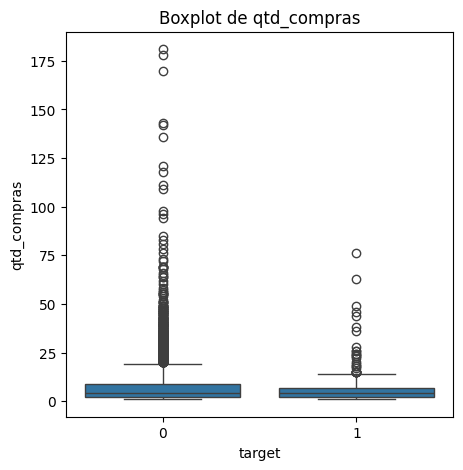

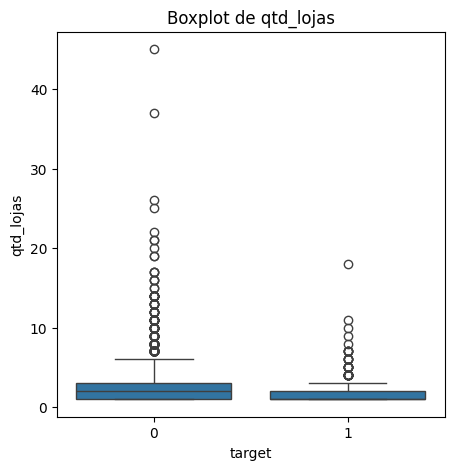

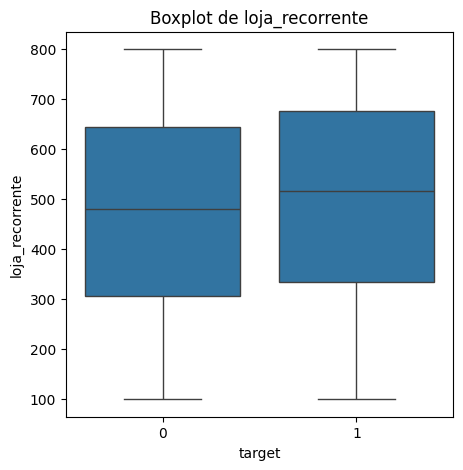

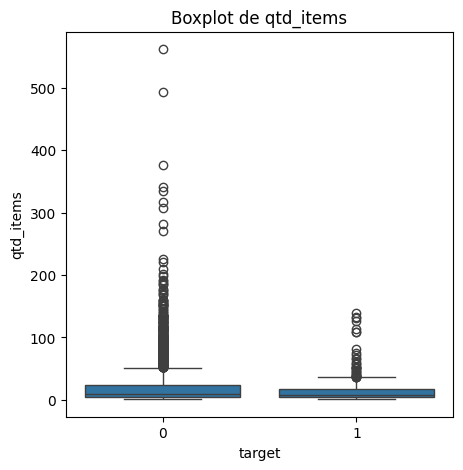

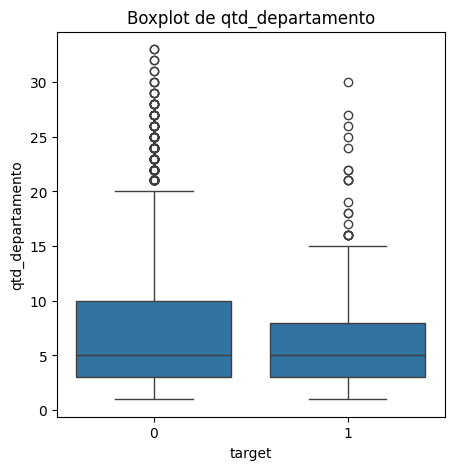

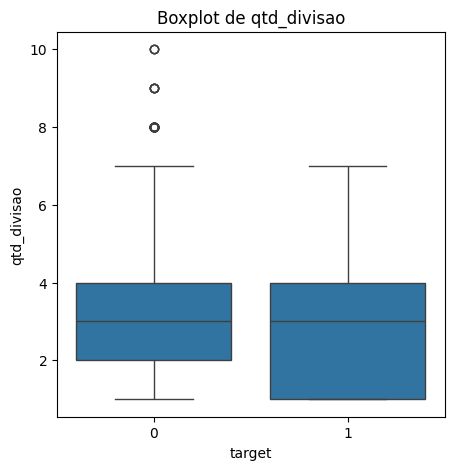

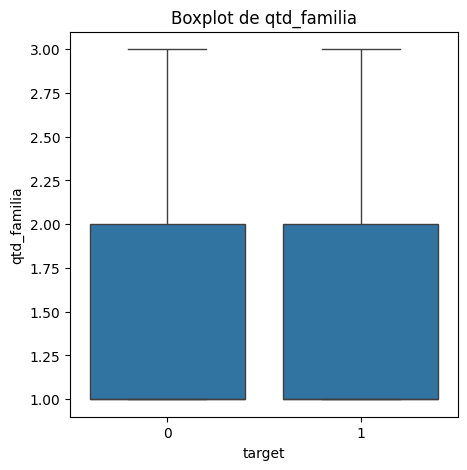

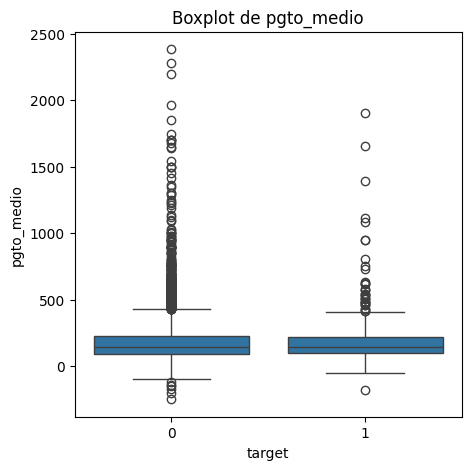

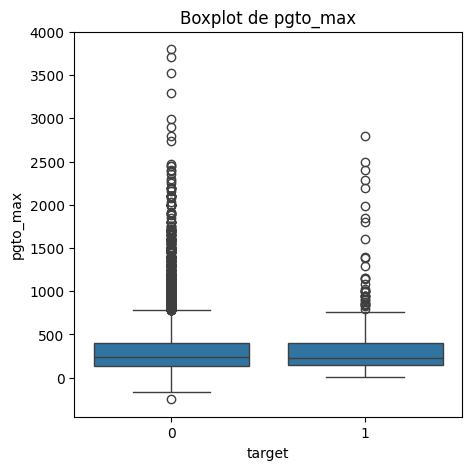

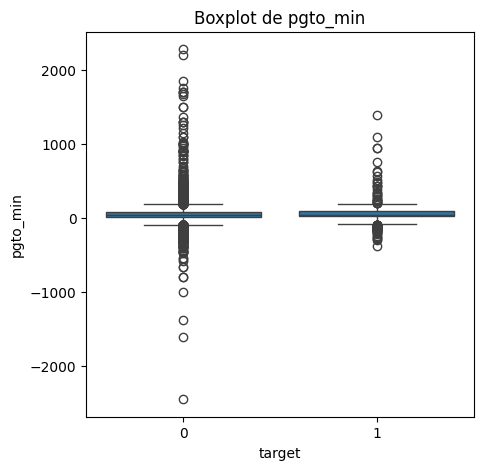

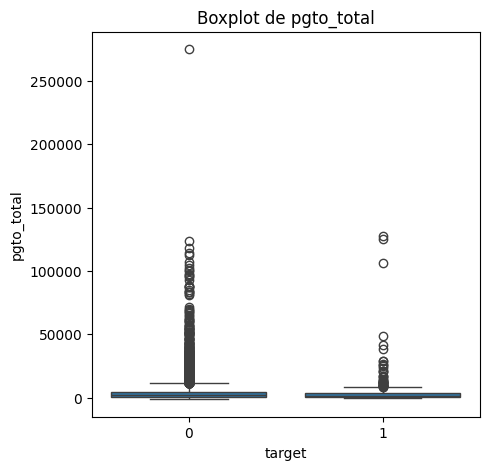

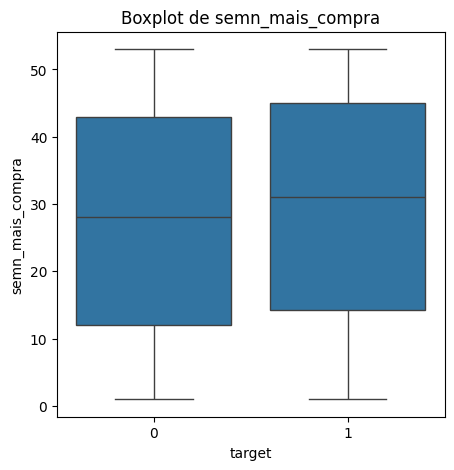

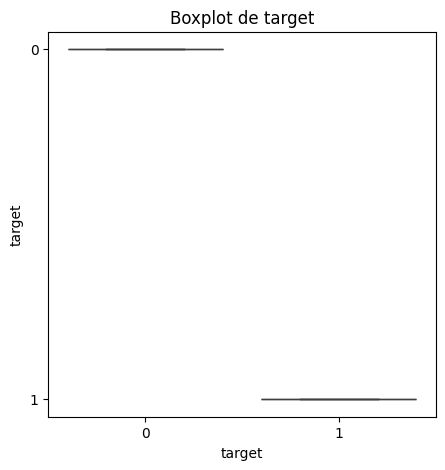

In [24]:
for i in df_agrupado.columns.drop('id_cliente', 'target'):
    plt.figure(figsize=(5,5))
    sns.boxplot(x='target', y=i, data=df_agrupado)
    plt.title(f'Boxplot de {i}')

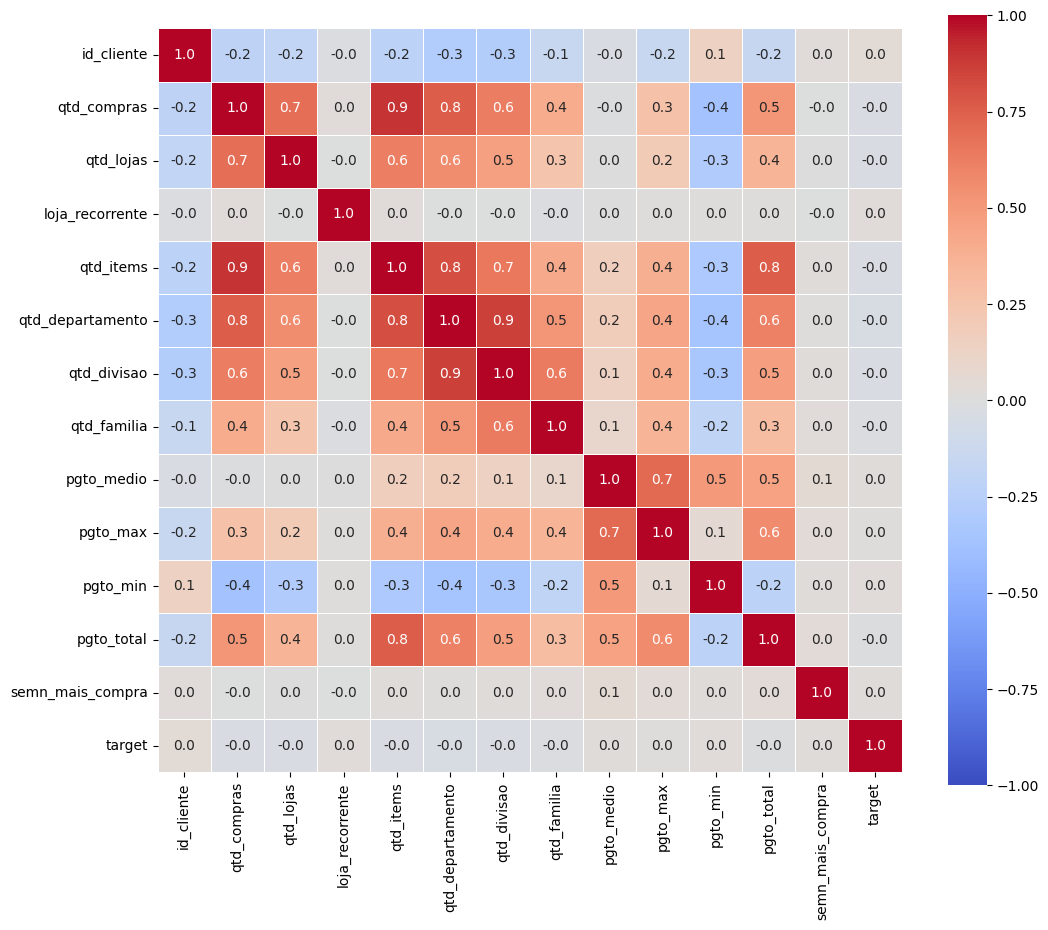

In [25]:
#correlation matrix
corrmat = df_agrupado.corr()
f, ax = plt.subplots(figsize=(12, 10))

# vamx: valor máximo
# vmin: valor mínimo
# annot: se True, escreve os dados no mapa de calor
# fmt: formatação dos dados decimais
# linewidth: largura da linha que divide os quadrados
# cmap: mapa de cores
# square: se True, os quadrados são desenhados

sns.heatmap(corrmat, vmax=1, vmin=-1, annot=True, 
            fmt=".1f", linewidth=.5, cmap='coolwarm', 
            square=True,);

In [26]:
columns_outliers = ['pgto_min', 'pgto_total', 'pgto_min', 'pgto_max', 'pgto_medio', 'qtd_divisao', 'qtd_items', 'qtd_lojas', 'qtd_compras']
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Exemplo de uso:
for i in columns_outliers:
    df_agrupado = filter_outliers(df_agrupado, i)

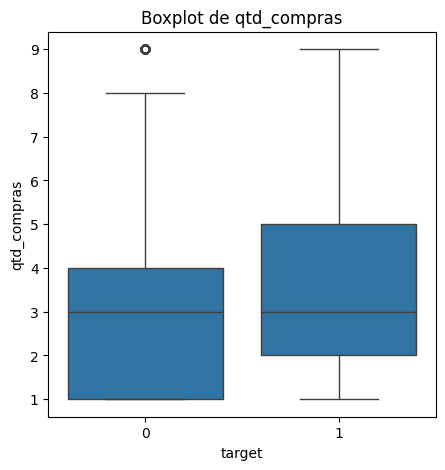

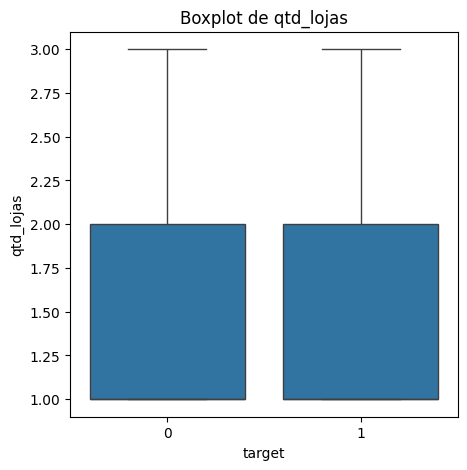

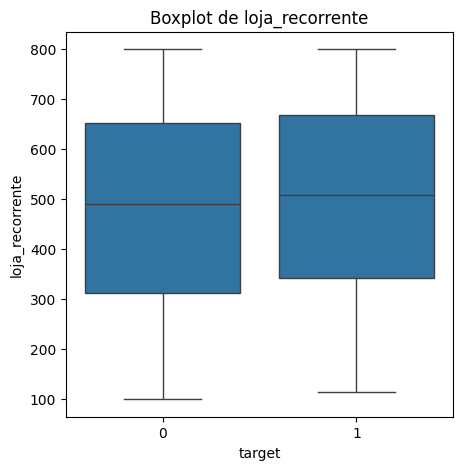

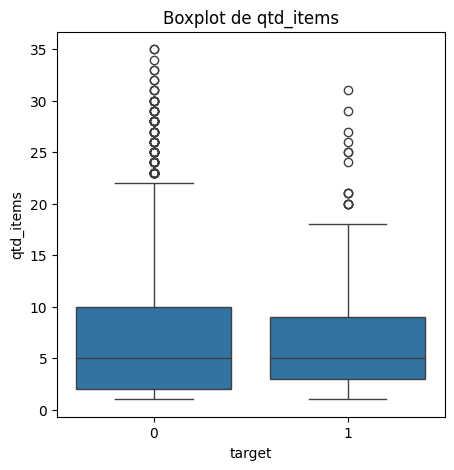

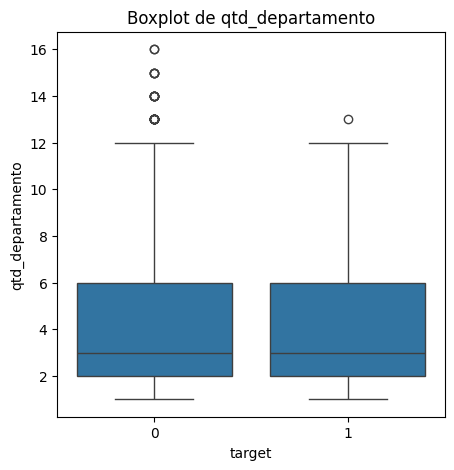

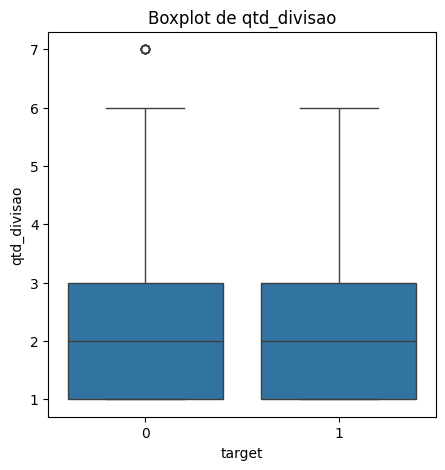

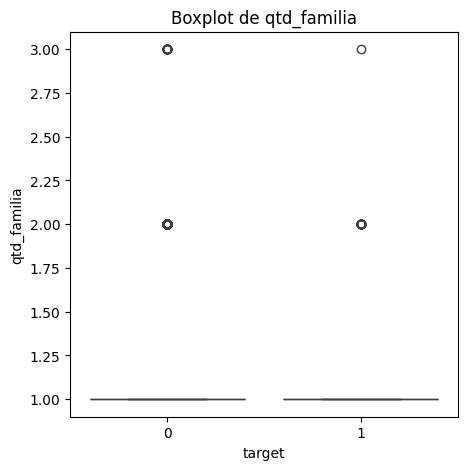

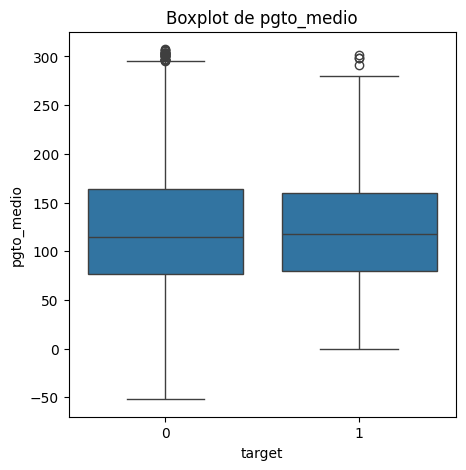

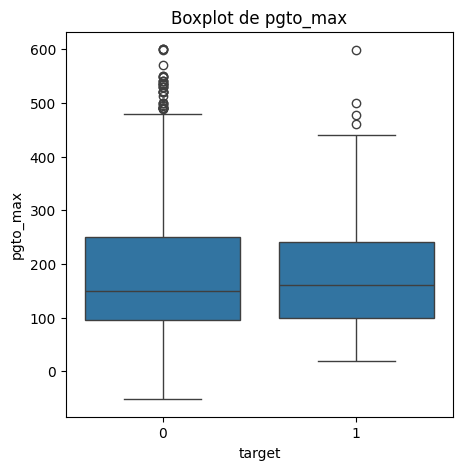

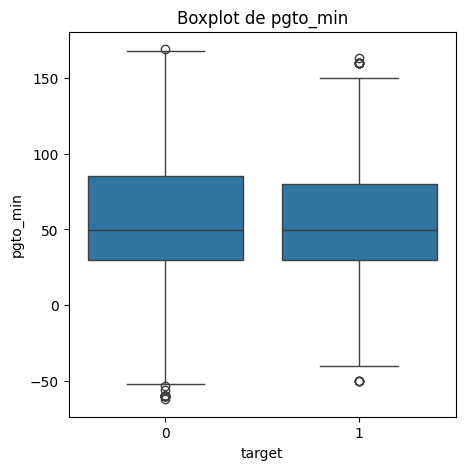

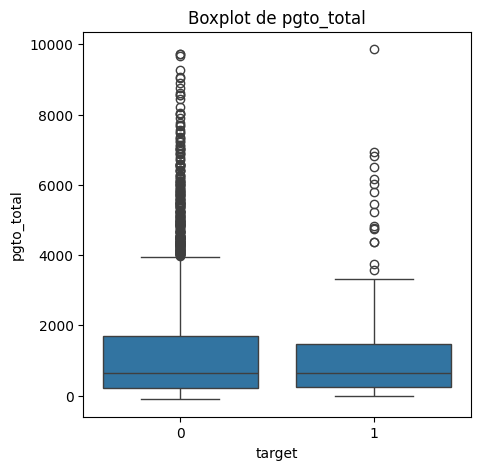

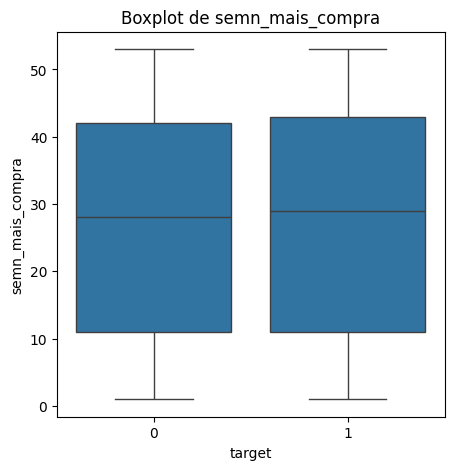

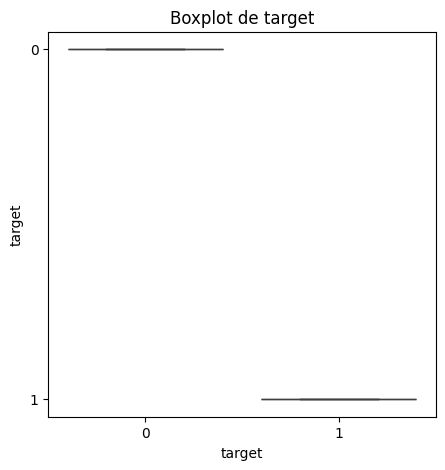

In [27]:
for i in df_agrupado.columns.drop('id_cliente', 'target'):
    plt.figure(figsize=(5,5))
    sns.boxplot(x='target', y=i, data=df_agrupado)
    plt.title(f'Boxplot de {i}')

In [28]:
def metricas(scores,target):
    return pd.DataFrame({
        'KS'   : [ks2(scores,target)],
        'ROC'  : [roc_auc_score(y_score=scores,y_true=target)],
        'GINI' : [2 * roc_auc_score(y_score=scores,y_true=target) - 1]
          })
    
def ks2(score, alvo):
    b2 = pd.crosstab(score, alvo, rownames = ['score']).reset_index()
    if len(np.unique(alvo)) > 1:
        freq_bom = b2.iloc[:,1]/sum(b2.iloc[:,1])
        freq_mau = b2.iloc[:,2]/sum(b2.iloc[:,2])
        ac_bom = np.cumsum(freq_bom)
        ac_mau = np.cumsum(freq_mau)
        diff = np.abs(ac_bom - ac_mau).round(7)
        ks = diff.max() * 100
    else:
        ks = 0
    return ks

def tabela_geral(modelos, X,y,nomes):
  lista = []
  noms = []
  for i in range(len(modelos)):
    tab = metricas(modelos[i].predict_proba(X)[:,0],y)
    lista.append(tab)
    nom = nomes[i]
    noms.append(nom)   
  tabela_g = pd.concat([lista[0],lista[1]],ignore_index=True)
  tabela_g['modelo']= noms
  return tabela_g[['modelo', 'KS','ROC','GINI']]  

def plot_scores(df, score_base='Score_solucao'):
    num_bins = 10 
    plt.figure(figsize=(8, 4))
    plt.hist(df[score_base], num_bins, facecolor='blue', alpha=0.4,label=str(score_base))
    plt.legend(prop={'size': 10})
    plt.xlabel("Scores")
    plt.ylabel("Frequencia")
    tittle = str('Histogram')
    plt.title("{}".format(str(tittle)))
    plt.show()

import matplotlib.pyplot as plt
def plot_graph(x,y,x_nome,y_nome,tittle):
  fig = plt.figure(figsize=(15, 4))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(x,y,label=str(x_nome))
  plt.legend(prop={'size': 10})
  plt.xlabel(str(x_nome))
  plt.ylabel(str(y_nome))
  plt.title(str(tittle))
  plt.show()

In [29]:
X = df_agrupado.drop(['id_cliente', 'target', 'pgto_max'], axis=1)
y = df_agrupado['target'].astype(int)
resultados = []

numero_repeticoes = 5
algoritmos = []

for k in range(0,numero_repeticoes):
        metricas_cada_validacao = []
        i = 0
        skf = StratifiedKFold(n_splits=2+k, random_state=None)
        for train_index, val_index in skf.split(X,y):
            i += 1
            X_train, X_test = X.iloc[train_index], X.iloc[val_index]
            y_train, y_test = y.iloc[train_index], y.iloc[val_index]
            modelo_01 = XGBClassifier(subsample= 0.6, silent= False, reg_lambda= 1.0, n_estimators= 100,
                          min_child_weight= 7.0, max_depth= 20, learning_rate= 0.01, gamma= 0, 
                          colsample_bytree= 0.5, colsample_bylevel= 0.9)
            modelo_01.fit(X_train,y_train)
            algoritmos.append(modelo_01)
            metricas_cada_validacao.append(metricas(modelo_01.predict_proba(X)[:,1],y))
            print("Resultado da Validação nº",i,":",metricas(modelo_01.predict_proba(X)[:,0],y))
        resultados.append(pd.DataFrame({'Validacao '+str(k):pd.concat(metricas_cada_validacao).apply(np.mean,axis=0)}))
pd.concat(resultados,axis=1)
     

Resultado da Validação nº 1 :          KS       ROC      GINI
0  27.12993  0.336591 -0.326818
Resultado da Validação nº 2 :          KS       ROC     GINI
0  25.77131  0.340795 -0.31841
Resultado da Validação nº 1 :          KS       ROC      GINI
0  37.30155  0.266844 -0.466312
Resultado da Validação nº 2 :          KS       ROC      GINI
0  39.20036  0.254393 -0.491213
Resultado da Validação nº 3 :          KS       ROC      GINI
0  30.92845  0.299101 -0.401798
Resultado da Validação nº 1 :          KS       ROC      GINI
0  43.55127  0.223866 -0.552267
Resultado da Validação nº 2 :          KS       ROC      GINI
0  42.81963  0.231373 -0.537255
Resultado da Validação nº 3 :          KS       ROC      GINI
0  42.33568  0.245143 -0.509715
Resultado da Validação nº 4 :          KS       ROC      GINI
0  39.56862  0.248472 -0.503056
Resultado da Validação nº 1 :          KS       ROC      GINI
0  44.49386  0.224603 -0.550793
Resultado da Validação nº 2 :          KS       ROC      GINI


,Validacao 0,Validacao 1,Validacao 2,Validacao 3,Validacao 4
KS,26.450620,35.810120,42.068800,43.621964,45.516630
ROC,0.661306,0.726554,0.762786,0.774667,0.783547
GINI,0.322613,0.453108,0.525573,0.549334,0.567095


In [30]:
from sklearn.utils.class_weight import compute_class_weight
# from lightgbm import LGBMClassifier

# Calculate COM class weight
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print('Weight:', weights)

# Create a dictionary with class labels as keys and computed weights as values
class_weight_dict = dict(zip(classes, weights))
print('Dict:',class_weight_dict)

# Initialize the LGBM model with class weights
# lgb_model = LGBMClassifier(class_weight=class_weight_dict)
# lgb_model.fit(X_train_encoded, y_train)

Weight: [0.53132448 8.48097826]
Dict: {np.int64(0): np.float64(0.531324480762683), np.int64(1): np.float64(8.480978260869565)}


In [31]:

X = df_agrupado.drop(['id_cliente', 'target'], axis=1)
y = df_agrupado['target'].astype(int)


# Definir as estratégias de pré-processamento para cada tipo de dado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
    # ,('scaler', StandardScaler())
])

# Definir as colunas numéricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# Criar o pré-processador para as colunas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Criar o pipeline com o pré-processador e o classificador
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(subsample= 0.6, silent= False, reg_lambda= 1.5, reg_alpha=1.5, gamma= 0,
                                 scale_pos_weight=1))   # class_weight=class_weight_dict,
])

# Definir os parâmetros para o GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 500],
    'classifier__max_depth': [5, 15, 30],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
    # 'classifier__class_weight': ['balanced']
}

# Criar o objeto GridSearchCV com o pipeline e os parâmetros
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=24), scoring='f1') #

# Treinar o modelo com o GridSearchCV
grid_search.fit(X, y)

# Imprimir os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Imprimir o relatório de classificação
print("Relatório de classificação:")
print(classification_report(y, grid_search.predict(X)))

Melhores parâmetros encontrados:
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 15, 'classifier__n_estimators': 300}
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3524
           1       1.00      0.79      0.88       221

    accuracy                           0.99      3745
   macro avg       0.99      0.90      0.94      3745
weighted avg       0.99      0.99      0.99      3745



In [32]:
probabilidades = grid_search.predict_proba(X)[:,1]
rótulos_verdadeiros = y

thresholds = np.arange(5, 101, 5) / 100
resultados = []

# Calcular a precisão e recall para cada threshold
for threshold in thresholds:
    # Converter as probabilidades em rótulos preditos usando o threshold
    rótulos_preditos = [1 if prob >= threshold else 0 for prob in probabilidades]
    
    # Calcular a precisão e recall
    precisão = precision_score(rótulos_verdadeiros, rótulos_preditos)
    recall = recall_score(rótulos_verdadeiros, rótulos_preditos)
    roc = roc_auc_score(rótulos_verdadeiros, rótulos_preditos)
    
    # Adicionar os resultados à lista
    resultados.append({'Threshold': threshold, 'Precisão': precisão, 'Recall': recall, 'ROC': roc})

# Criar um DataFrame com os resultados
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados


,Threshold,Precisão,Recall,ROC
0,0.05,0.343168,1.000000,0.939983
1,0.10,0.692790,1.000000,0.986095
2,0.15,0.887550,1.000000,0.996027
3,0.20,0.956140,0.986425,0.991794
4,0.25,0.995392,0.977376,0.988546
5,0.30,0.995283,0.954751,0.977234
6,0.35,1.000000,0.941176,0.970588
7,0.40,1.000000,0.904977,0.952489
8,0.45,1.000000,0.873303,0.936652
9,0.50,1.000000,0.791855,0.895928


In [33]:
probabilidades = grid_search.predict_proba(X)[:,1]
rótulos_verdadeiros = y

thresholds = np.arange(5, 101, 5) / 100
resultados = []

# Calcular a precisão e recall para cada threshold
for threshold in thresholds:
    # Converter as probabilidades em rótulos preditos usando o threshold
    rótulos_preditos = [1 if prob >= threshold else 0 for prob in probabilidades]
    
    # Calcular a precisão e recall
    precisão = precision_score(rótulos_verdadeiros, rótulos_preditos)
    recall = recall_score(rótulos_verdadeiros, rótulos_preditos)
    roc = roc_auc_score(rótulos_verdadeiros, rótulos_preditos)
    
    # Adicionar os resultados à lista
    resultados.append({'Threshold': threshold, 'Precisão': precisão, 'Recall': recall, 'ROC': roc})

# Criar um DataFrame com os resultados
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados

# 	Threshold	Precisão	Recall	ROC
#   0	0.05	0.390459	1.000000	0.951050
#   1	0.10	0.699367	1.000000	0.986521
#   2	0.15	0.887550	1.000000	0.996027
#   3	0.20	0.964912	0.995475	0.996602
#   4	0.25	0.990741	0.968326	0.983879
#   5	0.30	0.995349	0.968326	0.984021
#   6	0.35	0.995327	0.963801	0.981759
#   7	0.40	1.000000	0.941176	0.970588
#   8	0.45	1.000000	0.932127	0.966063
#   9	0.50	1.000000	0.886878	0.943439
# 10	0.55	1.000000	0.814480	0.907240
# 11	0.60	1.000000	0.746606	0.873303
# 12	0.65	1.000000	0.624434	0.812217
# 13	0.70	1.000000	0.470588	0.735294
# 14	0.75	1.000000	0.257919	0.628959
# 15	0.80	1.000000	0.144796	0.572398
# 16	0.85	1.000000	0.036199	0.518100
# 17	0.90	1.000000	0.004525	0.502262
# 18	0.95	0.000000	0.000000	0.500000
# 19	1.00	0.000000	0.000000	0.500000

,Threshold,Precisão,Recall,ROC
0,0.05,0.343168,1.000000,0.939983
1,0.10,0.692790,1.000000,0.986095
2,0.15,0.887550,1.000000,0.996027
3,0.20,0.956140,0.986425,0.991794
4,0.25,0.995392,0.977376,0.988546
5,0.30,0.995283,0.954751,0.977234
6,0.35,1.000000,0.941176,0.970588
7,0.40,1.000000,0.904977,0.952489
8,0.45,1.000000,0.873303,0.936652
9,0.50,1.000000,0.791855,0.895928


In [34]:
# Predição
X_test = df_agrupado_teste.drop(['id_cliente', 'target'], axis=1)
y_test = df_agrupado_teste['target'].astype(int)
# Imprimir o relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, grid_search.predict(X_test)))

# Relatório de classificação:
#               precision    recall  f1-score   support
# 
#            0       0.97      0.99      0.98      6930
#            1       0.85      0.52      0.64       386
# 
#     accuracy                           0.97      7316
#    macro avg       0.91      0.76      0.81      7316
# weighted avg       0.97      0.97      0.97      7316

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6930
           1       0.98      0.46      0.62       386

    accuracy                           0.97      7316
   macro avg       0.98      0.73      0.80      7316
weighted avg       0.97      0.97      0.97      7316



In [35]:
probabilidades = grid_search.predict_proba(X_test)[:,1]
rótulos_verdadeiros = y_test

thresholds = np.arange(5, 101, 5) / 100
resultados = []

# Calcular a precisão e recall para cada threshold
for threshold in thresholds:
    # Converter as probabilidades em rótulos preditos usando o threshold
    rótulos_preditos = [1 if prob >= threshold else 0 for prob in probabilidades]
    
    # Calcular a precisão e recall
    precisão = precision_score(rótulos_verdadeiros, rótulos_preditos)
    recall = recall_score(rótulos_verdadeiros, rótulos_preditos)
    roc = roc_auc_score(rótulos_verdadeiros, rótulos_preditos)
    
    # Adicionar os resultados à lista
    resultados.append({'Threshold': threshold, 'Precisão': precisão, 'Recall': recall, 'ROC': roc})

# Criar um DataFrame com os resultados
tabela_resultados = pd.DataFrame(resultados)
tabela_resultados


# Threshold	Precisão	Recall	ROC
#   0	0.05	0.177117	0.709845	0.763075
#   1	0.10	0.298021	0.663212	0.788100
#   2	0.15	0.424870	0.637306	0.794627
#   3	0.20	0.521158	0.606218	0.787597
#   4	0.25	0.603774	0.580311	0.779549
#   5	0.30	0.678899	0.575130	0.779989
#   6	0.35	0.744898	0.567358	0.778268
#   7	0.40	0.803774	0.551813	0.772155
#   8	0.45	0.826772	0.544041	0.768846
#   9	0.50	0.846809	0.515544	0.755175
# 10	0.55	0.867299	0.474093	0.735026
# 11	0.60	0.897297	0.430052	0.713655
# 12	0.65	0.939189	0.360104	0.679402
# 13	0.70	0.945946	0.272021	0.635577
# 14	0.75	0.966667	0.150259	0.574985
# 15	0.80	1.000000	0.085492	0.542746
# 16	0.85	1.000000	0.020725	0.510363
# 17	0.90	1.000000	0.002591	0.501295
# 18	0.95	0.000000	0.000000	0.500000
# 19	1.00	0.000000	0.000000	0.500000

,Threshold,Precisão,Recall,ROC
0,0.05,0.154867,0.725389,0.752449
1,0.10,0.334651,0.658031,0.792580
2,0.15,0.518438,0.619171,0.793568
3,0.20,0.647222,0.603627,0.792650
4,0.25,0.750842,0.577720,0.783521
5,0.30,0.829457,0.554404,0.774027
6,0.35,0.889831,0.544041,0.770145
7,0.40,0.952830,0.523316,0.760937
8,0.45,0.975000,0.505181,0.752230
9,0.50,0.983240,0.455959,0.727763


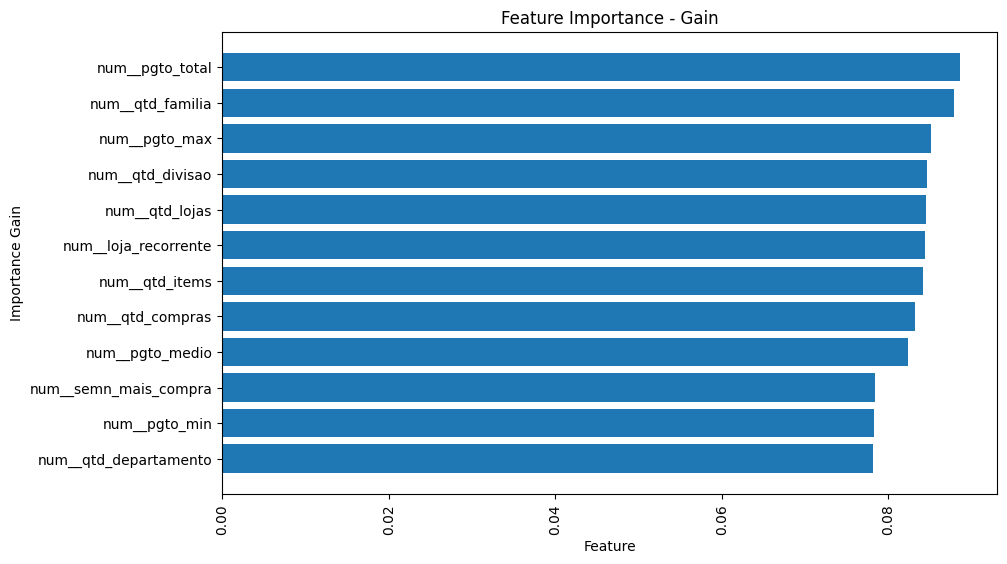

In [36]:
# Obter a importância das features
importance_fet = grid_search.best_estimator_.named_steps['classifier'].feature_importances_

# Criar um DataFrame com as importâncias das features
importance_df = pd.DataFrame({'Feature': grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out(), 'Importance Gain': importance_fet})

# Ordenar o DataFrame pela importância do gain
importance_df = importance_df.sort_values(by='Importance Gain', ascending=True)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance Gain'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Gain')
plt.title('Feature Importance - Gain')
plt.show()


In [37]:
import pickle 

# Caminho para salvar o arquivo pickle
caminho_arquivo = 'Artifacts/mdl_xgboost_20240630.pkl'

# Salvar o modelo em formato pickle
with open(caminho_arquivo, 'wb') as arquivo:
    pickle.dump(grid_search.best_estimator_, arquivo)